In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import torch
from PIL import Image

In [3]:
from instructany2pix import InstructAny2PixPipeline
ckpt = "instructany2pix_retrained"
llm_folder = 'llm-retrained'
pipe = InstructAny2PixPipeline(ckpt, llm_folder=llm_folder)
pipe.pipe.scheduler = pipe.pipe_inversion.scheduler

/home/jiazhi/miniconda3/envs/instructany2pix/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


/home/jiazhi/miniconda3/envs/instructany2pix/lib/python3.10/site-packages/torchvision/transforms/_functional_video.py:6: UserWarning: The 'torchvision.transforms._functional_video' module is deprecated since 0.12 and will be removed in the future. Please use the 'torchvision.transforms.functional' module instead.
  warnings.warn(
/home/jiazhi/miniconda3/envs/instructany2pix/lib/python3.10/site-packages/torchvision/transforms/_transforms_video.py:22: UserWarning: The 'torchvision.transforms._transforms_video' module is deprecated since 0.12 and will be removed in the future. Please use the 'torchvision.transforms' module instead.
  warnings.warn(
Loading pipeline components...: 100%|██████████| 7/7 [00:00<00:00, 84.10it/s]
The `load_in_4bit` and `load_in_8bit` arguments are deprecated and will be removed in the future versions. Please, pass a `BitsAndBytesConfig` object in `quantization_config` argument instead.
You are using a model of type llava to instantiate a model of type instruct

pre_init


/home/jiazhi/miniconda3/envs/instructany2pix/lib/python3.10/site-packages/torch/nn/modules/module.py:2397: UserWarning: for vision_model.embeddings.class_embedding: copying from a non-meta parameter in the checkpoint to a meta parameter in the current model, which is a no-op. (Did you mean to pass `assign=True` to assign items in the state dictionary to their corresponding key in the module instead of copying them in place?)
  warnings.warn(
/home/jiazhi/miniconda3/envs/instructany2pix/lib/python3.10/site-packages/torch/nn/modules/module.py:2397: UserWarning: for vision_model.embeddings.patch_embedding.weight: copying from a non-meta parameter in the checkpoint to a meta parameter in the current model, which is a no-op. (Did you mean to pass `assign=True` to assign items in the state dictionary to their corresponding key in the module instead of copying them in place?)
  warnings.warn(
/home/jiazhi/miniconda3/envs/instructany2pix/lib/python3.10/site-packages/torch/nn/modules/module.py:

In [4]:
x = {"inst": "add <video> to <video>",
 "ans": "an image of an antique shop with a clock ticking",
 "mm_data": [
     {"type": "audio", "fname": "assets/demo/clock ticking.wav", }, 
     {"type": "image", "fname": "assets/demo/an antique shop.jpg", }],
}


In [5]:
inst = x['inst']
mm_data = x['mm_data']

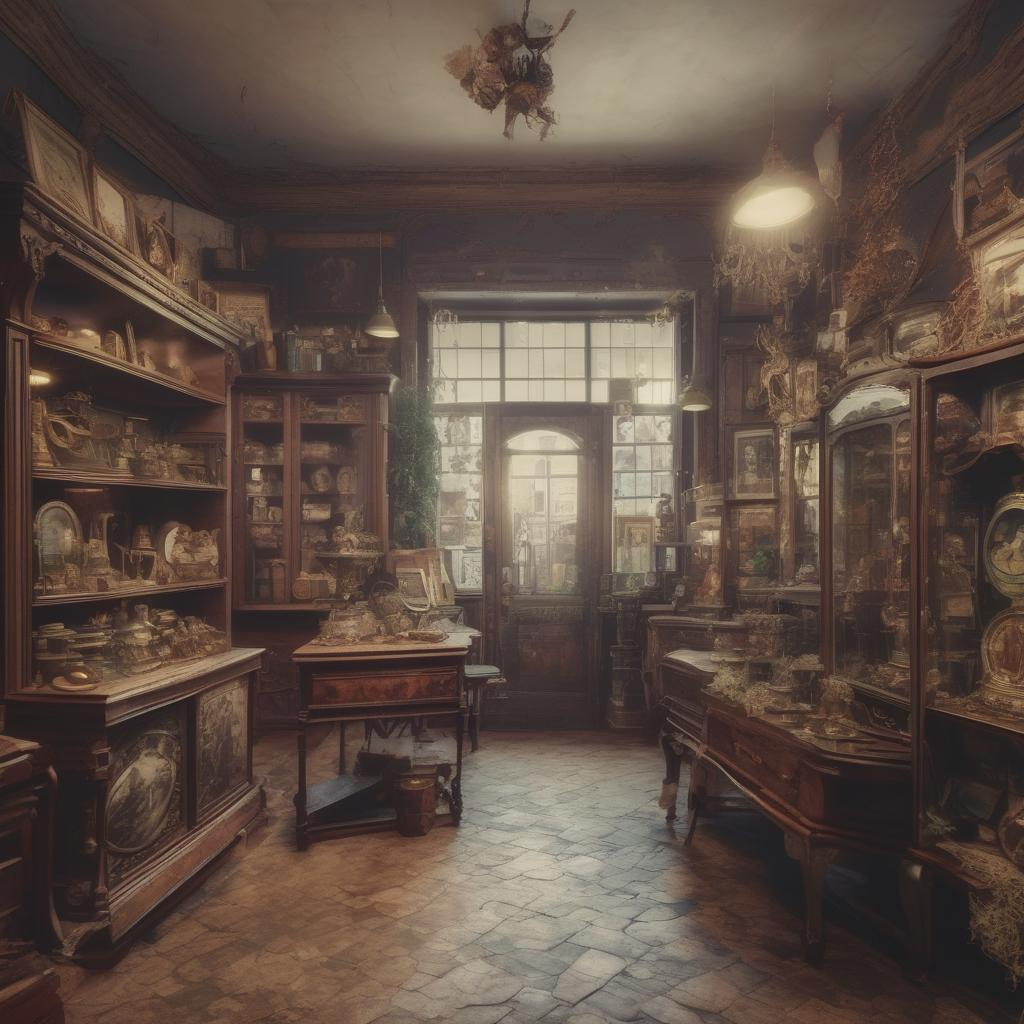

In [6]:
Image.open("assets/demo/an antique shop.jpg")

In [7]:
torch.manual_seed(0)
print(inst)
print(mm_data)
res0,res,_ = pipe(inst,mm_data,alpha = 1.0,h=[0.4,0.6,0.4],norm=20.0,refinement=0.3,llm_only=False,num_inference_steps=50)

add <video> to <video>
[{'type': 'audio', 'fname': 'assets/demo/clock ticking.wav'}, {'type': 'image', 'fname': 'assets/demo/an antique shop.jpg'}]
djsalsdjas
cpu
cuda:0
cuda:0
djasdlasld
cuda:0
djasljd
cuda:0


/home/jiazhi/miniconda3/envs/instructany2pix/lib/python3.10/site-packages/bitsandbytes/nn/modules.py:451: UserWarning: Input type into Linear4bit is torch.float16, but bnb_4bit_compute_dtype=torch.float32 (default). This will lead to slow inference or training speed.
  warnings.warn(


/home/jiazhi/miniconda3/envs/instructany2pix/lib/python3.10/site-packages/bitsandbytes/nn/modules.py:446: UserWarning: Input type into Linear4bit is torch.float16, but bnb_4bit_compute_dtype=torch.float32 (default). This will lead to slow inference.
  warnings.warn(


["<s> A chat between a curious user and an artificial intelligence assistant. The assistant gives helpful, detailed, and polite answers to the user's questions. USER: add <video> to <video> ASSISTANT: Absolutely, its,<base><video><im_gen_start><im_gen>[an image of a room filled with shelves and cabinets, with a clock on the wall and the sound of a ticking clock]<video>additions:ticking clock:<video>.</s>"]


100%|██████████| 50/50 [00:03<00:00, 16.58it/s]


torch.Size([1, 1024])
tensor([[False, False, False,  ..., False, False, False]], device='cuda:0')


100%|██████████| 15/15 [00:01<00:00, 12.91it/s]


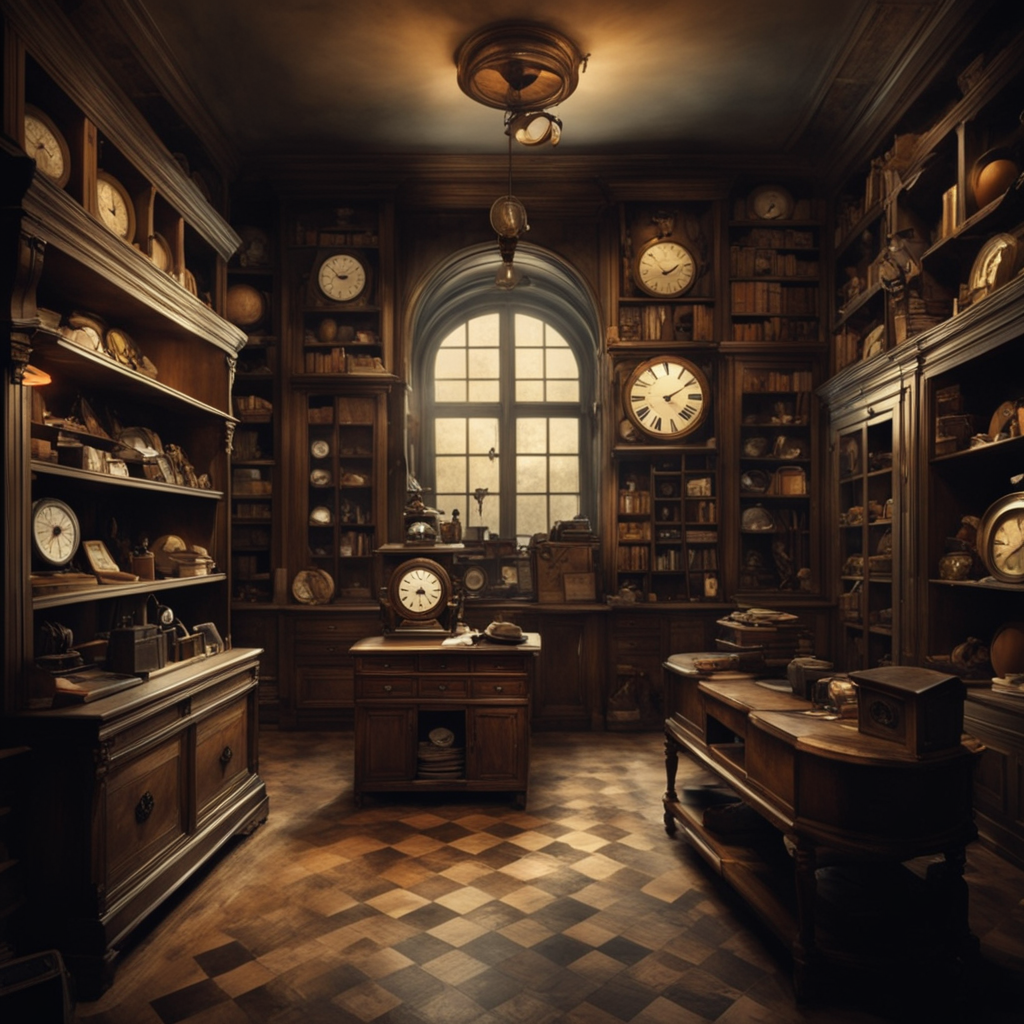

In [8]:
res